In [63]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy as sp
import statsmodels as sm
import seaborn as sns
import warnings
pd.set_option("display.max_columns", 1000)
sns.set_style('darkgrid')
sns.set_palette('colorblind')
plt.figure(figsize = (15,13))
sns.set(rc={'figure.figsize':(15,13)})
sns.set(style="ticks", color_codes=True)
warnings.filterwarnings(action="ignore")
# pd.set_option("display.min_rows",4)

<Figure size 1080x936 with 0 Axes>

In [152]:
# define one hot encoding for categorical var
def one_hot_encoder(df, nan_as_category = True):
    original_columns = list(df.columns)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    categorical_columns.remove("deposit")
    df = pd.get_dummies(df, columns= categorical_columns, dummy_na= nan_as_category, drop_first=True)
    new_columns = [c for c in df.columns if c not in original_columns]
    return df, new_columns

In [65]:
def reduce_mem_usage(df, verbose=True):
  numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
  start_mem = df.memory_usage().sum() / 1024**2
  for col in df.columns:
    col_type = df[col].dtypes
    if col_type in numerics:
      c_min = df[col].min()
      c_max = df[col].max()
      if str(col_type)[:3] == 'int':
        if c_min > np.iinfo(np.int8).min and c_max < np.iinfo(np.int8).max:
          df[col] = df[col].astype(np.int8)
        elif c_min > np.iinfo(np.int16).min and c_max < np.iinfo(np.int16).max:
          df[col] = df[col].astype(np.int16)
        elif c_min > np.iinfo(np.int32).min and c_max < np.iinfo(np.int32).max:
          df[col] = df[col].astype(np.int32)
        elif c_min > np.iinfo(np.int64).min and c_max < np.iinfo(np.int64).max:
          df[col] = df[col].astype(np.int64)
      else:
        if c_min > np.finfo(np.float16).min and c_max < np.finfo(np.float16).max:
          df[col] = df[col].astype(np.float16)
        elif c_min > np.finfo(np.float32).min and c_max < np.finfo(np.float32).max:
          df[col] = df[col].astype(np.float32)
        else:
          df[col] = df[col].astype(np.float64)

  end_mem = df.memory_usage().sum() / 1024**2
  print('Memory usage after optimization is: {:.2f} MB'.format(end_mem))
  print('Decreased by {:.1f}%'.format(100 * (start_mem - end_mem) / start_mem))

  return df

In [153]:
data = pd.read_csv("data/bank.csv", sep=",")
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [68]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


In [72]:
test = data.copy()

In [69]:
pwd

'/Users/hq2nguye/Desktop/stat441_project'

In [70]:
plt.figure(figsize = (13,13))

sns.distplot(data["balance"], bins =100)
plt.savefig('/Users/hq2nguye/Desktop/stat441_project/images/orignal_balance.png')

plt.clf()

<Figure size 936x936 with 0 Axes>

In [313]:
np.log(test["balance"] + abs(test["balance"].min()) + 1).mean()

8.995432292407646

In [73]:
plt.figure(figsize = (13,13))

sns.distplot(np.log(test["balance"] + 6848), bins =150, kde = False)

plt.savefig('/Users/hq2nguye/Desktop/stat441_project/images/logtransform_balance.png')

plt.clf()

<Figure size 936x936 with 0 Axes>

In [70]:
test = data.copy()
test["balance_new"] = (data["balance"]-data["balance"].mean())/data["balance"].std()

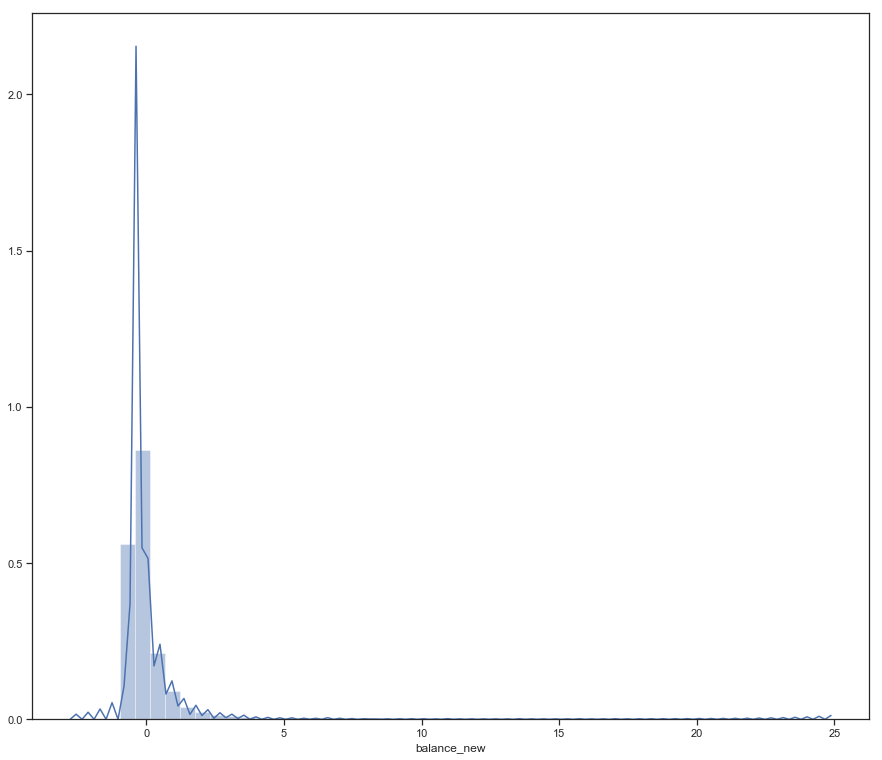

In [71]:
sns.distplot(test["balance_new"])

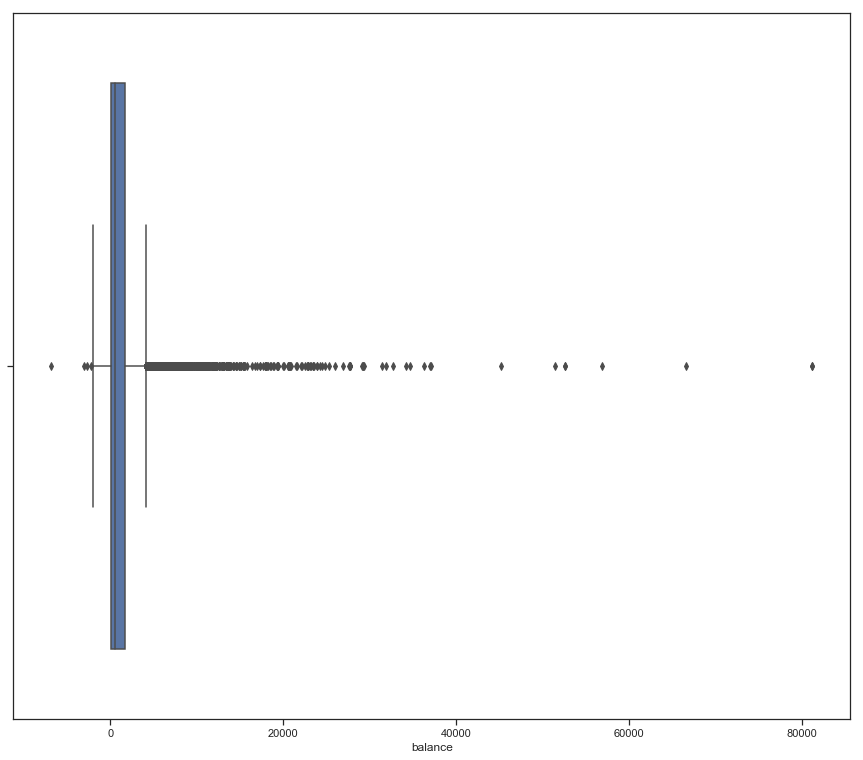

In [45]:
sns.boxplot(data["balance"])

In [76]:
data["ID"] = data.index

In [5]:
data.info()
# df.dtypes.sort_values()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [10]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000


# Missing Values

In [11]:
columns = data.columns
percent_missing = data.isnull().sum() * 100 / len(data)
missing_value_df = pd.DataFrame({'column_name': columns,
                                 'percent_missing (%)': percent_missing})
missing_value_df.sort_values('percent_missing (%)', inplace=True, ascending=False)
missing_value_df.head(50)

,column_name,percent_missing (%)
age,age,0.0
day,day,0.0
poutcome,poutcome,0.0
previous,previous,0.0
pdays,pdays,0.0
campaign,campaign,0.0
duration,duration,0.0
month,month,0.0
contact,contact,0.0
job,job,0.0


In [13]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object']

In [19]:
for col in categorical_columns:
    df = data.groupby(col)["ID"].nunique().sort_values(ascending=False)
    print(df.head(10))
    print("\n")

job
management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
Name: ID, dtype: int64


marital
married     6351
single      3518
divorced    1293
Name: ID, dtype: int64


education
secondary    5476
tertiary     3689
primary      1500
unknown       497
Name: ID, dtype: int64


default
no     10994
yes      168
Name: ID, dtype: int64


housing
no     5881
yes    5281
Name: ID, dtype: int64


loan
no     9702
yes    1460
Name: ID, dtype: int64


contact
cellular     8042
unknown      2346
telephone     774
Name: ID, dtype: int64


month
may    2824
aug    1519
jul    1514
jun    1222
nov     943
apr     923
feb     776
oct     392
jan     344
sep     319
Name: ID, dtype: int64


poutcome
unknown    8326
failure    1228
success    1071
other       537
Name: ID, dtype: int64


deposit
no     5873
yes    5289
Name: ID, dtype: int64

In [18]:
data[data["job"] != "unknown"].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 11092 entries, 0 to 11161
Data columns (total 17 columns):
age          11092 non-null int64
job          11092 non-null object
marital      11092 non-null object
education    11092 non-null object
default      11092 non-null object
balance      11092 non-null int64
housing      11092 non-null object
loan         11092 non-null object
contact      11092 non-null object
day          11092 non-null int64
month        11092 non-null object
duration     11092 non-null int64
campaign     11092 non-null int64
pdays        11092 non-null int64
previous     11092 non-null int64
poutcome     11092 non-null object
deposit      11092 non-null object
dtypes: int64(7), object(10)
memory usage: 1.5+ MB


In [19]:
test = data.copy()
for col in categorical_columns:
    test = test[test[col] != "unknown"]
    
test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2675 entries, 890 to 11160
Data columns (total 17 columns):
age          2675 non-null int64
job          2675 non-null object
marital      2675 non-null object
education    2675 non-null object
default      2675 non-null object
balance      2675 non-null int64
housing      2675 non-null object
loan         2675 non-null object
contact      2675 non-null object
day          2675 non-null int64
month        2675 non-null object
duration     2675 non-null int64
campaign     2675 non-null int64
pdays        2675 non-null int64
previous     2675 non-null int64
poutcome     2675 non-null object
deposit      2675 non-null object
dtypes: int64(7), object(10)
memory usage: 376.2+ KB


In [16]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 17 columns):
age          11162 non-null int64
job          11162 non-null object
marital      11162 non-null object
education    11162 non-null object
default      11162 non-null object
balance      11162 non-null int64
housing      11162 non-null object
loan         11162 non-null object
contact      11162 non-null object
day          11162 non-null int64
month        11162 non-null object
duration     11162 non-null int64
campaign     11162 non-null int64
pdays        11162 non-null int64
previous     11162 non-null int64
poutcome     11162 non-null object
deposit      11162 non-null object
dtypes: int64(7), object(10)
memory usage: 1.4+ MB


In [59]:
pwd

'/Users/hq2nguye/Desktop/stat441_project'

In [74]:
plt.figure(figsize = (13,13))

sns.pairplot(data, hue="deposit")
plt.savefig('/Users/hq2nguye/Desktop/stat441_project/images/pairplot.png')
plt.clf()

<Figure size 936x936 with 0 Axes>

<Figure size 1316.6x1260 with 0 Axes>

In [129]:
data["classnum"] = data["deposit"].apply(lambda x: 1 if x=="yes" else 0)

In [132]:
50/8.3

6.024096385542168

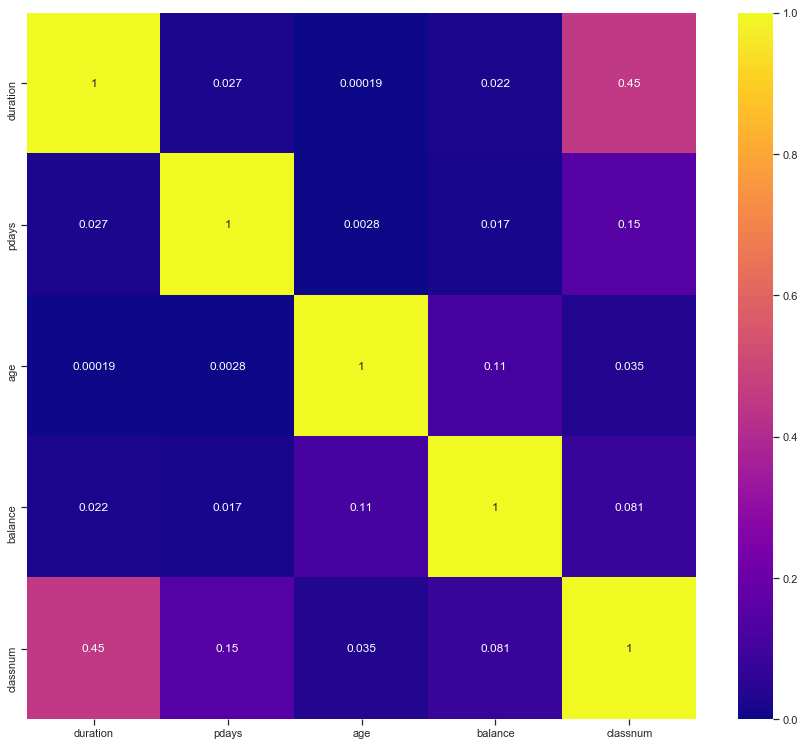

In [131]:
plt.clf()
# calculate the correlation matrix
corr = data.drop(['ID'], axis = 1)[["duration", "pdays", "age", "balance", "classnum"]].corr().abs()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="plasma", annot=True)
plt.savefig('/Users/hq2nguye/Desktop/stat441_project/images/corr_heatmap_gbm.png')

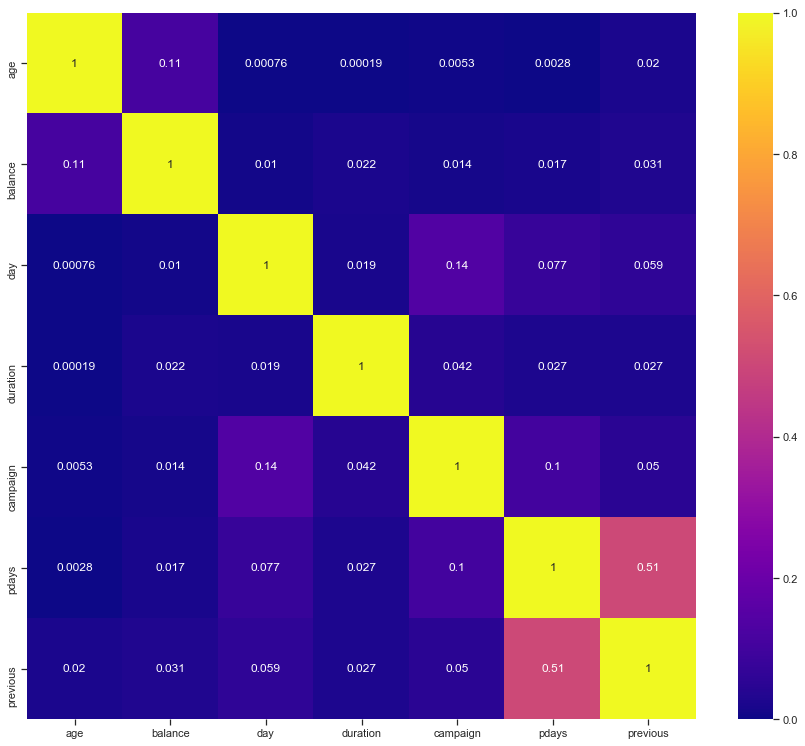

In [77]:
plt.clf()
# calculate the correlation matrix
corr = data.drop(['ID'], axis = 1).corr().abs()

# plot the heatmap
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns, cmap="plasma", annot=True)
plt.savefig('/Users/hq2nguye/Desktop/stat441_project/images/corr_heatmap.png')

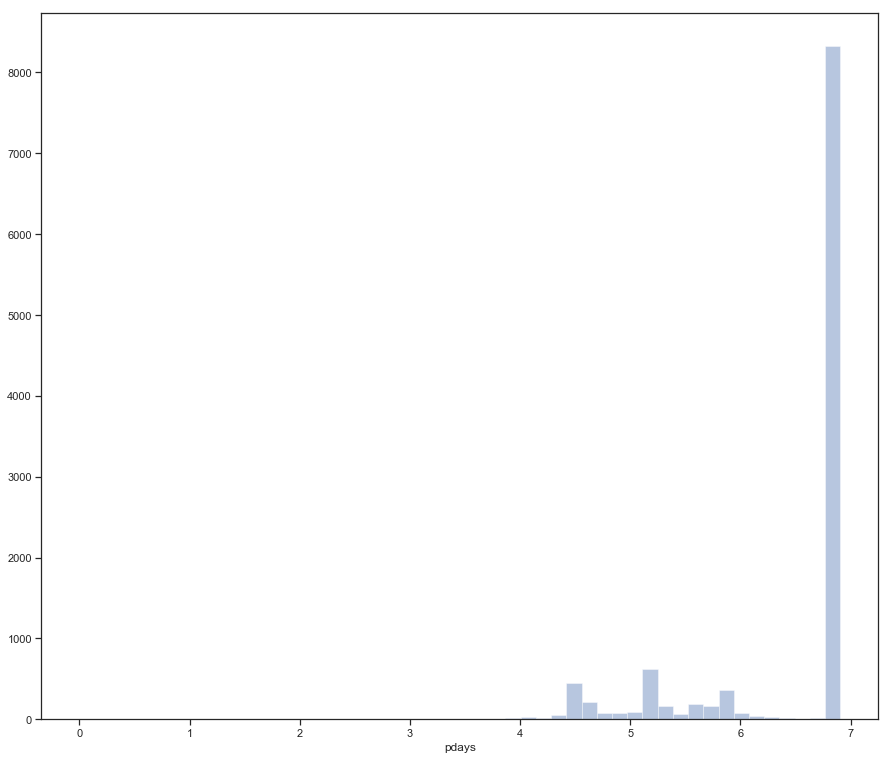

In [118]:
test["pdays"].replace(-1, 999, inplace = True)
# sns.distplot((test["pdays"]-data["pdays"].mean())/data["pdays"].std(), kde=False)
sns.distplot(np.log(test["pdays"]), kde=False)

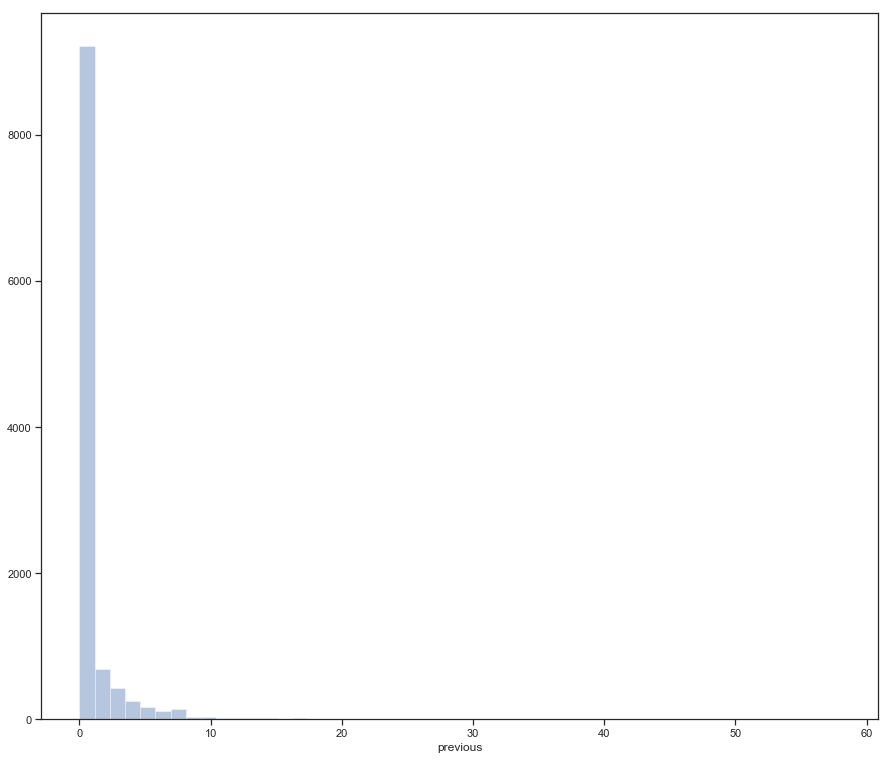

In [115]:
sns.distplot(data["previous"], kde=False)

In [22]:
df = data.groupby("pdays")["ID"].nunique().sort_values(ascending=False)
print(df)
# WTF is -1????

pdays
-1      8324
 92      106
 182      89
 91       84
 181      81
 183      73
 184      52
 94       42
 93       41
 95       39
 87       34
 90       32
 98       31
 185      30
 187      28
 96       26
 97       26
 188      24
 189      24
 99       22
 105      22
 179      21
 186      20
 175      20
 88       19
 180      19
 196      19
 370      19
 89       18
 190      18
        ... 
 579       1
 586       1
 587       1
 594       1
 595       1
 616       1
 626       1
 648       1
 651       1
 683       1
 690       1
 421       1
 842       1
 112       1
 247       1
 228       1
 529       1
 532       1
 233       1
 241       1
 541       1
 425       1
 553       1
 544       1
 550       1
 118       1
 551       1
 424       1
 422       1
 854       1
Name: ID, Length: 472, dtype: int64


In [36]:
df = data.groupby("day")["ID"].nunique().sort_values(ascending=False)
print(df.head(10))
# WTF is -1????

day
20    570
18    548
30    478
5     477
15    466
14    463
13    453
21    452
6     447
12    445
Name: ID, dtype: int64


In [59]:
df = data.groupby("duration")["ID"].nunique().sort_values(ascending=False)
print(df.head())

duration
97     39
161    38
158    37
119    37
150    37
Name: ID, dtype: int64


In [23]:
for col in ["pdays"]:
    df = data.groupby(col)["ID"].nunique()
    df_depot = data_depo.groupby(col)["ID"].nunique()
    result = pd.concat([df_depot, df], axis=1, join='inner')
    result["percentage_deposit"] = result.iloc[:,0]/result.iloc[:,1]
    result = result.iloc[:,2]
    print(result.sort_values(ascending=False))
    print("\n")

NameError: name 'data_depo' is not defined

# Take a deeper look at those who actually deposit

In [80]:
data_depo = data[data["deposit"] == "yes"]

The following outputs may tells us about some key insights of those who openned a deposits and when are they last contacted:

- think about what each of these element tells us about the likelihood of someone openning a deposit

job
student          0.747222
retired          0.663239
unemployed       0.565826
management       0.507015
unknown          0.485714
admin.           0.473013
self-employed    0.461728
technician       0.460779
services         0.399783
housemaid        0.397810
entrepreneur     0.375000
blue-collar      0.364198
Name: percentage_deposit, dtype: float64


marital
single      0.543491
divorced    0.481052
married     0.433790
Name: percentage_deposit, dtype: float64


education
tertiary     0.541068
unknown      0.507042
secondary    0.447407
primary      0.394000
Name: percentage_deposit, dtype: float64


default
no     0.476351
yes    0.309524
Name: percentage_deposit, dtype: float64


housing
no     0.570311
yes    0.366408
Name: percentage_deposit, dtype: float64


loan
no     0.495259
yes    0.331507
Name: percentage_deposit, dtype: float64


contact
cellular     0.543273
telephone    0.503876
unknown      0.225916
Name: percentage_deposit, dtype: float64


month
dec    0.909091
m

<Figure size 1080x936 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

<Figure size 416.6x360 with 0 Axes>

<Figure size 936x936 with 0 Axes>

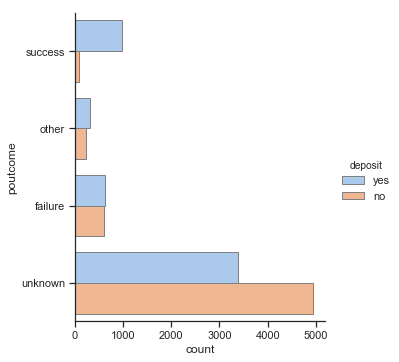

In [112]:
categorical_columns = [col for col in data.columns if data[col].dtype == 'object' and
                      col != "deposit"]

for col in categorical_columns:
    plt.clf()
    df = data.groupby(col)["ID"].nunique()
    df_depot = data_depo.groupby(col)["ID"].nunique()
    result = pd.concat([df_depot, df], axis=1, join='inner')
    result["percentage_deposit"] = result.iloc[:,0]/result.iloc[:,1]
    result = result.iloc[:,2]
    result = result.sort_values(ascending=False)
    print(result)
    plt.figure(figsize = (13,13))
    result = result.reset_index()
    sns.catplot(y=col, hue="deposit", kind="count", order= result[col].tolist(),
            palette="pastel", edgecolor=".5",margin_titles=True,legend=True,
            data=data);
    plt.savefig(f'/Users/hq2nguye/Desktop/stat441_project/images/catplot_{col}.png')
    print("\n")

In [184]:
for col in ["day","previous", "pdays", "campaign"]:
    df = data.groupby(col)["ID"].nunique()
    df_depot = data_depo.groupby(col)["ID"].nunique()
    result = pd.concat([df_depot, df], axis=1, join='inner')
    result["percentage_deposit"] = result.iloc[:,0]/result.iloc[:,1]
    result = result.iloc[:,2]
    print(result.sort_values(ascending=False))
    print("\n")
# Wait the date of the month in which the client is contacted matters???

day
10    0.742331
1     0.737705
25    0.593750
3     0.581699
22    0.572491
4     0.572139
30    0.566946
12    0.548315
2     0.544910
13    0.532009
27    0.528169
16    0.520325
23    0.514286
15    0.510730
24    0.508197
9     0.491758
11    0.485255
8     0.479714
26    0.460317
14    0.453564
5     0.450734
21    0.444690
17    0.428224
18    0.416058
7     0.410995
6     0.404922
28    0.348780
20    0.336842
29    0.332474
31    0.328571
19    0.317708
Name: percentage_deposit, dtype: float64


previous
58    1.000000
30    1.000000
29    1.000000
26    1.000000
22    1.000000
21    1.000000
55    1.000000
10    0.866667
14    0.833333
13    0.818182
5     0.733333
6     0.709402
9     0.705882
7     0.701299
4     0.700820
3     0.675862
2     0.658009
1     0.657272
11    0.652174
8     0.650000
12    0.625000
19    0.500000
20    0.500000
23    0.500000
0     0.406535
17    0.272727
15    0.200000
Name: percentage_deposit, dtype: float64


pdays
854    1.000000
375    1.

In [ ]:
test = data[data["pdays"]!=-1]

In [73]:
# plt.hist(data["pdays"]!=-1,bins=50)

## todo:

- Segment the age into groups instead of leaving it as numerical (optional)

- replace unknowns by mode; except for "contact"

- Standardize

- shuffle data and put 10% of data aside

- [?] wtf is -1 in "pdays"? (1) replace by 999 (for now)

- "previous": no. of times they're contacted before opening an account. (1) numerical or (2) cat

- [?] deal with neg "balance". (1) Keep it as it it. (2) add the O(1) and take log()

- month: jan-apr-july-oct: q1; feb-may-aug-nov: mid of Q; mar-june-sep-dec: end of Q 

- [?] for the "day", do TS analysis based on y/n. ===> WAIT FOR DING^2

- poutcomes: (1) merge others as unknown 

--

In [190]:
data.describe()

,age,balance,day,duration,campaign,pdays,previous,ID
count,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1528.538524,15.658036,371.993818,2.508421,51.330407,0.832557,5580.500000
std,11.913369,3225.413326,8.420740,347.128386,2.722077,108.758282,2.292007,3222.336187
min,18.000000,-6847.000000,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,122.000000,8.000000,138.000000,1.000000,-1.000000,0.000000,2790.250000
50%,39.000000,550.000000,15.000000,255.000000,2.000000,-1.000000,0.000000,5580.500000
75%,49.000000,1708.000000,22.000000,496.000000,3.000000,20.750000,1.000000,8370.750000
max,95.000000,81204.000000,31.000000,3881.000000,63.000000,854.000000,58.000000,11161.000000


In [209]:
data["balance"].min()*(-1) + 1

6848

In [213]:
tmp = data.copy()

In [214]:
tmp["balance"] = (tmp["balance"] - tmp["balance"].mean())/tmp["balance"].std()
tmp.describe()

,age,balance,day,duration,campaign,pdays,previous,ID
count,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,1.273146e-17,15.658036,371.993818,2.508421,51.330407,0.832557,5580.500000
std,11.913369,1.000000e+00,8.420740,347.128386,2.722077,108.758282,2.292007,3222.336187
min,18.000000,-2.596733e+00,1.000000,2.000000,1.000000,-1.000000,0.000000,0.000000
25%,32.000000,-4.360801e-01,8.000000,138.000000,1.000000,-1.000000,0.000000,2790.250000
50%,39.000000,-3.033839e-01,15.000000,255.000000,2.000000,-1.000000,0.000000,5580.500000
75%,49.000000,5.563984e-02,22.000000,496.000000,3.000000,20.750000,1.000000,8370.750000
max,95.000000,2.470240e+01,31.000000,3881.000000,63.000000,854.000000,58.000000,11161.000000


In [147]:
def transform_pipeline(dtfr):
    df = dtfr.copy()
    # log transform balance
    df["balance"] = np.log(df["balance"] + abs(df["balance"].min()) + 1)
    categorical_columns = [col for col in df.columns if df[col].dtype == 'object']
    for col in categorical_columns:
        if col not in ["contact", "poutcome"]:
            data[col].replace('unknown', data[col].mode()[0], inplace=True)
    df["pdays"].replace(-1, 999, inplace = True)
    df["month"] =  df["month"].apply(lambda x: "EarlyQuarter" if (x in ["jan","apr", "jul","oct"])
                                     else ("MidQuarter" if (x in ["feb","may","aug","oct"]) else
                                          "EndQuarter"))
    """
    Group 1: 1,10
    Group 2: 19,20,28,29,31
    Group 3: others
    """
    df["day"] = df["day"].apply(lambda x: "gr1" if (x in [1,10])
                               else ("gr2" if (x in [19,20,28,29,31]) else "gr3"))
    # df = df.drop("ID", axis=1)
    
    df["poutcome"].replace("other", "unknown", inplace = True)
    df, _ = one_hot_encoder(df)
    
    nan_cols = ["month_nan", "contact_nan", "loan_nan", "housing_nan", "default_nan",
                  "education_nan", "marital_nan", "job_nan", "day_nan", "poutcome_nan"]

    for col in nan_cols:
        del df[col]
        
    df = reduce_mem_usage(df)
    return df

In [318]:
data.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit,ID
0,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes,0
1,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes,1
2,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes,2
3,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes,3
4,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes,4


In [319]:
import time

#### NO ONE HOT

In [10]:
%time
data_transform_no_onehot = transform_pipeline(data)

CPU times: user 2 µs, sys: 0 ns, total: 2 µs
Wall time: 6.91 µs
Memory usage after optimization is: 1.03 MB
Decreased by 28.7%


In [11]:
data_transform_no_onehot.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
0,59,admin.,married,secondary,no,9.125000,yes,no,unknown,gr3,MidQuarter,1042,1,999,0,unknown,yes
1,56,admin.,married,secondary,no,8.835938,no,no,unknown,gr3,MidQuarter,1467,1,999,0,unknown,yes
2,41,technician,married,secondary,no,9.000000,yes,no,unknown,gr3,MidQuarter,1389,1,999,0,unknown,yes
3,55,services,married,secondary,no,9.140625,yes,no,unknown,gr3,MidQuarter,579,1,999,0,unknown,yes
4,54,admin.,married,tertiary,no,8.859375,no,no,unknown,gr3,MidQuarter,673,2,999,0,unknown,yes


#### ONE HOT

In [148]:
data["education"].mode()[0]

'secondary'

In [149]:
del data["ID"]
data_transform = transform_pipeline(data)

Memory usage after optimization is: 0.46 MB
Decreased by 51.7%


In [150]:
data_transform.head()

,age,balance,duration,campaign,pdays,previous,deposit,classnum,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_married,marital_single,education_secondary,education_tertiary,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown
0,59,9.125000,1042,1,999,0,yes,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
1,56,8.835938,1467,1,999,0,yes,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,1,0,1
2,41,9.000000,1389,1,999,0,yes,1,0,0,0,0,0,0,0,0,1,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
3,55,9.140625,579,1,999,0,yes,1,0,0,0,0,0,0,1,0,0,0,1,0,1,0,0,1,0,0,1,0,1,0,1,0,1
4,54,8.859375,673,2,999,0,yes,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,0,1,0,1,0,1


In [321]:
data_transform.describe()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day_gr1,day_gr2,day_gr3,month_EarlyQuarter,month_EndQuarter,month_MidQuarter,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,inf,371.993818,2.508421,797.074897,0.832557,0.119513,0.174162,0.029385,0.024548,0.236158,0.069701,0.036284,0.082691,0.032252,0.163322,0.031984,0.115839,0.568984,0.315176,0.134385,0.535119,0.330496,0.984949,0.015051,0.526877,0.473123,0.869199,0.130801,0.720480,0.069342,0.210177,0.025533,0.169504,0.804963,0.284268,0.257122,0.458610,0.110016,0.095951,0.794033
std,11.913369,2.543945e-01,347.128386,2.722077,351.280201,2.292007,0.324405,0.379266,0.168892,0.154749,0.424740,0.254653,0.187004,0.275427,0.176677,0.369676,0.175964,0.320047,0.495241,0.464607,0.341080,0.498787,0.470413,0.121761,0.121761,0.499299,0.499299,0.337198,0.337198,0.448783,0.254047,0.407453,0.157745,0.375213,0.396247,0.451085,0.437067,0.498306,0.312924,0.294537,0.404424
min,18.000000,0.000000e+00,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,8.851562e+00,138.000000,1.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,8.906250e+00,255.000000,2.000000,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,9.054688e+00,496.000000,3.000000,999.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,1.138281e+01,3881.000000,63.000000,999.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [135]:
data_transform.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11162 entries, 0 to 11161
Data columns (total 36 columns):
age                    11162 non-null int8
balance                11162 non-null float16
duration               11162 non-null int16
campaign               11162 non-null int8
pdays                  11162 non-null int16
previous               11162 non-null int8
deposit                11162 non-null object
ID                     11162 non-null int16
classnum               11162 non-null int8
job_blue-collar        11162 non-null uint8
job_entrepreneur       11162 non-null uint8
job_housemaid          11162 non-null uint8
job_management         11162 non-null uint8
job_retired            11162 non-null uint8
job_self-employed      11162 non-null uint8
job_services           11162 non-null uint8
job_student            11162 non-null uint8
job_technician         11162 non-null uint8
job_unemployed         11162 non-null uint8
job_unknown            11162 non-null uint8
marital_marr

In [297]:
# sns.distplot(data_transform["balance"])
# data_transform["balance"].unique()

In [144]:
# there is no nan double check
# data_transform[data_transform["month_nan"] == 1]

In [8]:
data_transform.to_csv("bank_transformed_onehot.csv", sep = ",", index = False)

In [379]:
data_transform.describe()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day_gr1,day_gr2,day_gr3,month_EarlyQuarter,month_EndQuarter,month_MidQuarter,poutcome_failure,poutcome_success,poutcome_unknown
count,11162.000000,1.116200e+04,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000,11162.000000
mean,41.231948,inf,371.993818,2.508421,797.074897,0.832557,0.119513,0.174162,0.029385,0.024548,0.236158,0.069701,0.036284,0.082691,0.032252,0.163322,0.031984,0.115839,0.568984,0.315176,0.134385,0.535119,0.330496,0.984949,0.015051,0.526877,0.473123,0.869199,0.130801,0.720480,0.069342,0.210177,0.025533,0.169504,0.804963,0.284268,0.257122,0.458610,0.110016,0.095951,0.794033
std,11.913369,2.543945e-01,347.128386,2.722077,351.280201,2.292007,0.324405,0.379266,0.168892,0.154749,0.424740,0.254653,0.187004,0.275427,0.176677,0.369676,0.175964,0.320047,0.495241,0.464607,0.341080,0.498787,0.470413,0.121761,0.121761,0.499299,0.499299,0.337198,0.337198,0.448783,0.254047,0.407453,0.157745,0.375213,0.396247,0.451085,0.437067,0.498306,0.312924,0.294537,0.404424
min,18.000000,0.000000e+00,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,32.000000,8.851562e+00,138.000000,1.000000,521.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,39.000000,8.906250e+00,255.000000,2.000000,999.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,49.000000,9.054688e+00,496.000000,3.000000,999.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000
max,95.000000,1.138281e+01,3881.000000,63.000000,999.000000,58.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#### DIRECT TRANSFORM

In [55]:
data_direct_transformed, _ = one_hot_encoder(data)
data_direct_transformed = reduce_mem_usage(data_direct_transformed)

Memory usage after optimization is: 0.68 MB
Decreased by 40.7%


In [56]:
data_direct_transformed.head()

,age,balance,day,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,job_nan,marital_married,marital_single,marital_nan,education_secondary,education_tertiary,education_unknown,education_nan,default_yes,default_nan,housing_yes,housing_nan,loan_yes,loan_nan,contact_telephone,contact_unknown,contact_nan,month_aug,month_dec,month_feb,month_jan,month_jul,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,month_nan,poutcome_other,poutcome_success,poutcome_unknown,poutcome_nan
0,59,2343,5,1042,1,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
1,56,45,5,1467,1,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
2,41,1270,5,1389,1,-1,0,yes,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
3,55,2476,5,579,1,-1,0,yes,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0
4,54,184,5,673,2,-1,0,yes,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0


# Train Test Split and Standard Scaler (One Hot)

In [154]:
data_transform = transform_pipeline(data)

Memory usage after optimization is: 0.47 MB
Decreased by 47.0%


In [140]:
np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
# np.log(train["balance"] + abs(data["balance"].min()) + 1).mean()

8.995432292407646

In [178]:
%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Shuffle dataframe
# tmp = data_transform.sample(frac=1).reset_index(drop=True)

# define X and y
# X = data_transform.drop("deposit", axis = 1)
# y = data_transform["deposit"]

# train test split
# train, test = train_test_split(tmp, test_size = 0.3, random_state = 44119)

def normalization(traindf, df):
    for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
        if col != "balance":
            df[col] = (df[col] - traindf[col].mean()) / traindf[col].std()
        else:
            # for some reasons trainset["balance"].mean() results into "inf" after the log transformation so we hard coded the train mean here
            train_mean = 8.995432292407646
            df[col] = (df[col] - train_mean) / traindf[col].std()
    return df


def split_data(df):
    # Shuffle dataframe
    df = df.sample(frac=1).reset_index(drop=True)

    # train test split: 70/30 ratio from the entire data set
    trainset, testset = train_test_split(df, test_size=0.3, random_state=44119)
    # split valid and test: 50/50 ratio from the test set
    validset, testset = train_test_split(testset, test_size=0.5, random_state=44119)

    # normalization
    train = normalization(trainset, trainset)
    valid = normalization(trainset, validset)
    test = normalization(trainset, testset)
    return train, valid, test

CPU times: user 5 µs, sys: 1e+03 ns, total: 6 µs
Wall time: 12.9 µs


In [179]:
%time
trainset, validset, testset = split_data(data_transform)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.96 µs


In [180]:
trainset.head()

,age,balance,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown
8469,1.070151,0.223022,1.817701,-0.185741,0.566179,-0.369644,yes,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,1,0,0,0,0,1
4868,-0.432486,-0.350342,-0.627518,0.179799,-1.759361,0.095942,no,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,1,0,0,0
4356,-1.016845,-0.605469,-0.633244,0.545338,-1.314350,0.561527,no,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,1,0,0
711,0.485792,-0.541504,-0.656150,-0.551280,0.566179,-0.369644,no,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1
47,1.070151,0.637207,-0.392731,-0.185741,0.566179,-0.369644,yes,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1


In [181]:
validset.head()

,age,balance,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown
7100,36.0,-0.070312,90.0,13.0,999.0,2.364535e-17,no,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1
10480,33.0,0.148438,91.0,2.0,999.0,2.364535e-17,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,1,0,0,1
1231,34.0,-0.101562,10.0,6.0,999.0,2.364535e-17,no,0,0,0,1,0,0,0,0,0,0,0,0,1,0,1,0,0,1,0,0,0,0,1,0,1,0,1
9483,32.0,-0.015625,298.0,2.0,999.0,2.364535e-17,no,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,1,0,1,0,1,0,1
5986,34.0,0.351562,963.0,1.0,999.0,2.364535e-17,yes,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,1,0,0,1


In [182]:
testset.head()

,age,balance,duration,campaign,pdays,previous,deposit,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown
7420,34.0,-0.140625,61.0,2.0,999.0,2.364535e-17,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,1,0,0,0,1,0,1,0,1
31,39.0,-0.156250,510.0,1.0,999.0,2.364535e-17,yes,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,0,0,1
9573,27.0,0.078125,687.0,2.0,300.0,1.000000e+00,no,0,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,0,1,1,0,0,0,1,0,1,0,0
9787,37.0,0.039062,138.0,2.0,999.0,2.364535e-17,yes,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0,1,0,1
6195,33.0,-0.164062,160.0,1.0,999.0,2.364535e-17,no,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,1,0,0,0,1,0,0,0,1


In [9]:
%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Shuffle dataframe
data_transform = data_transform.sample(frac=1).reset_index(drop=True)

# define X and y
X = data_transform.drop("deposit", axis = 1)
y = data_transform["deposit"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44119)

CPU times: user 3 µs, sys: 1 µs, total: 4 µs
Wall time: 5.72 µs


In [10]:
# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_test[col] = (X_test[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_test[col] = (X_test[col] - train_mean)/X_train[col].std()

In [11]:
# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_train[col] = (X_train[col] - train_mean)/X_train[col].std()

In [12]:
X_train["deposit"] = y_train
X_test["deposit"] = y_test

In [30]:
X_test.head()

,age,balance,duration,campaign,pdays,previous,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown,deposit
4179,1.338542,1.957031,1.002637,-0.557736,-1.812506,1.332288,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,1,1,0,0,0,yes
3781,1.084990,-0.150513,-0.303014,0.184298,-0.722593,0.910369,0,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,yes
10635,1.507577,-0.481689,-0.727846,-0.186719,0.577355,-0.355389,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0,1,0,1,no
1939,1.084990,-0.511719,0.841201,2.039382,0.577355,-0.355389,0,0,0,0,0,0,1,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,1,no
8104,-0.267291,-0.150513,-0.212383,0.184298,-2.002673,0.066531,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,1,0,1,1,0,yes


In [385]:
X_train.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day_gr1,day_gr2,day_gr3,month_EarlyQuarter,month_EndQuarter,month_MidQuarter,poutcome_failure,poutcome_success,poutcome_unknown,deposit
6877,-0.012541,-0.639160,0.639554,-0.191864,0.571898,-0.358347,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,1,0,0,1,1,0,1,0,0,0,0,1,0,1,0,0,0,1,no
10025,-0.855724,-0.547852,0.573670,-0.191864,-1.599183,2.696029,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,yes
2226,3.360192,2.708984,-0.391681,-0.191864,0.571898,-0.358347,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,0,1,0,1,0,1,0,0,1,0,0,0,1,0,1,0,0,0,1,no
3853,0.409051,1.705078,0.318726,-0.552226,0.571898,-0.358347,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,0,0,1,0,0,1,0,1,0,0,0,1,no
2718,-1.277315,-1.157227,1.304128,-0.191864,0.571898,-0.358347,0,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,1,0,0,1,1,0,1,0,0,0,0,1,0,0,1,0,0,1,yes


In [371]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8929 entries, 6877 to 6137
Data columns (total 42 columns):
age                    8929 non-null float64
balance                8929 non-null float16
duration               8929 non-null float64
campaign               8929 non-null float64
pdays                  8929 non-null float64
previous               8929 non-null int8
job_admin.             8929 non-null uint8
job_blue-collar        8929 non-null uint8
job_entrepreneur       8929 non-null uint8
job_housemaid          8929 non-null uint8
job_management         8929 non-null uint8
job_retired            8929 non-null uint8
job_self-employed      8929 non-null uint8
job_services           8929 non-null uint8
job_student            8929 non-null uint8
job_technician         8929 non-null uint8
job_unemployed         8929 non-null uint8
marital_divorced       8929 non-null uint8
marital_married        8929 non-null uint8
marital_single         8929 non-null uint8
education_primary    

In [372]:
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2233 entries, 4179 to 8410
Data columns (total 42 columns):
age                    2233 non-null float64
balance                2233 non-null float16
duration               2233 non-null float64
campaign               2233 non-null float64
pdays                  2233 non-null float64
previous               2233 non-null int8
job_admin.             2233 non-null uint8
job_blue-collar        2233 non-null uint8
job_entrepreneur       2233 non-null uint8
job_housemaid          2233 non-null uint8
job_management         2233 non-null uint8
job_retired            2233 non-null uint8
job_self-employed      2233 non-null uint8
job_services           2233 non-null uint8
job_student            2233 non-null uint8
job_technician         2233 non-null uint8
job_unemployed         2233 non-null uint8
marital_divorced       2233 non-null uint8
marital_married        2233 non-null uint8
marital_single         2233 non-null uint8
education_primary    

In [386]:
X_test["ID"] = X_test.index
df = X_test.groupby("deposit")["ID"].nunique().sort_values(ascending=False)
print(df.head(10))
del X_test["ID"]

deposit
no     1165
yes    1068
Name: ID, dtype: int64


In [387]:
X_train["ID"] = X_train.index
df = X_train.groupby("deposit")["ID"].nunique().sort_values(ascending=False)
print(df.head(10))
del X_train["ID"]

deposit
no     4708
yes    4221
Name: ID, dtype: int64


In [31]:
X_train.to_csv("trainset.csv", sep = ",", index = False)
# X_test.to_csv("testset.csv", sep = ",", index = False)

In [337]:
X_train.head()

,age,balance,duration,campaign,pdays,previous,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,marital_divorced,marital_married,marital_single,education_primary,education_secondary,education_tertiary,default_no,default_yes,housing_no,housing_yes,loan_no,loan_yes,contact_cellular,contact_telephone,contact_unknown,day_gr1,day_gr2,day_gr3,month_EarlyQuarter,month_EndQuarter,month_MidQuarter,poutcome_failure,poutcome_success,poutcome_unknown,deposit
4794,1.649928,-0.521973,-0.508702,-0.557062,0.57396,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,1,0,1,0,1,0,1,0,1,0,0,0,1,0,1,0,0,0,0,1,yes
7172,-0.607658,-0.521973,-0.157512,-0.187197,0.57396,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,no
9132,1.566314,-0.457031,-0.436737,-0.557062,0.57396,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,1,0,1,0,1,0,0,0,0,1,1,0,0,0,0,1,no
1648,-0.858501,-0.293701,-0.779291,-0.557062,0.57396,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,1,0,1,0,1,0,1,0,0,0,0,1,0,0,1,0,0,1,no
2635,-0.356815,-0.652832,0.714705,-0.187197,0.57396,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,1,0,0,1,1,0,0,0,1,0,0,1,0,0,1,0,0,1,yes


In [13]:
# define X and y
X = X_test.drop("deposit", axis = 1)
y = X_test["deposit"]

# train test split
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 44119)

X_valid["deposit"] = y_valid
X_test["deposit"] = y_test

X_valid.to_csv("validset.csv", sep = ",", index = False)
X_test.to_csv("testset.csv", sep = ",", index = False)

In [390]:
X_valid["ID"] = X_valid.index
df = X_valid.groupby("deposit")["ID"].nunique().sort_values(ascending=False)
print(df.head(10))
del X_valid["ID"]

deposit
no     582
yes    534
Name: ID, dtype: int64


In [391]:
X_test["ID"] = X_test.index
df = X_test.groupby("deposit")["ID"].nunique().sort_values(ascending=False)
print(df.head(10))
del X_test["ID"]

deposit
no     583
yes    534
Name: ID, dtype: int64


# Without pre-processing

In [58]:
%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Shuffle dataframe
data_direct_transformed = data_direct_transformed.sample(frac=1).reset_index(drop=True)

# define X and y
X = data_direct_transformed.drop("deposit", axis = 1)
y = data_direct_transformed["deposit"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44119)


# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_test[col] = (X_test[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_test[col] = (X_test[col] - train_mean)/X_train[col].std()
        
# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_train[col] = (X_train[col] - train_mean)/X_train[col].std()
        
X_train["deposit"] = y_train
X_test["deposit"] = y_test

X_train.to_csv("trainset_no_preprocessed.csv", sep = ",", index = False)


# define X and y
X = X_test.drop("deposit", axis = 1)
y = X_test["deposit"]

# train test split
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 44119)

X_valid["deposit"] = y_valid
X_test["deposit"] = y_test

X_valid.to_csv("validset_no_preprocessed.csv", sep = ",", index = False)
X_test.to_csv("testset_no_preprocessed.csv", sep = ",", index = False)

CPU times: user 3 µs, sys: 1e+03 ns, total: 4 µs
Wall time: 6.2 µs


# Without One Hot

In [12]:
%time
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

# Shuffle dataframe
data_transform_no_onehot = data_transform_no_onehot.sample(frac=1).reset_index(drop=True)

# define X and y
X = data_transform_no_onehot.drop("deposit", axis = 1)
y = data_transform_no_onehot["deposit"]

# train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.3, random_state = 44119)


# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_test[col] = (X_test[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_test[col] = (X_test[col] - train_mean)/X_train[col].std()
        
# Standard Scaler: normalization
for col in ["age", "balance", "duration", "campaign", "pdays", "previous"]:
    if col != "balance":
        X_train[col] = (X_train[col] - X_train[col].mean())/X_train[col].std()
    else:
        train_mean = np.log(data["balance"] + abs(data["balance"].min()) + 1).mean()
        X_train[col] = (X_train[col] - train_mean)/X_train[col].std()
        
X_train["deposit"] = y_train
X_test["deposit"] = y_test

X_train.to_csv("trainset_no_encoded.csv", sep = ",", index = False)


# define X and y
X = X_test.drop("deposit", axis = 1)
y = X_test["deposit"]

# train test split
X_valid, X_test, y_valid, y_test = train_test_split(X, y, test_size = 0.5, random_state = 44119)

X_valid["deposit"] = y_valid
X_test["deposit"] = y_test

X_valid.to_csv("validset_no_encoded.csv", sep = ",", index = False)
X_test.to_csv("testset_no_encoded.csv", sep = ",", index = False)

CPU times: user 3 µs, sys: 0 ns, total: 3 µs
Wall time: 7.39 µs


In [13]:
X_train.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,deposit
8469,-1.022011,unemployed,single,secondary,no,0.181152,no,no,cellular,gr3,EndQuarter,-0.369499,-0.566828,0.575653,-0.365397,unknown,yes
4868,-0.349422,management,married,tertiary,no,-0.573730,no,no,cellular,gr3,MidQuarter,-0.078622,-0.566828,0.575653,-0.365397,unknown,yes
4356,0.659461,management,married,tertiary,no,-0.452881,no,no,cellular,gr3,MidQuarter,-0.901803,0.953862,0.575653,-0.365397,unknown,no
711,-0.937938,services,married,secondary,no,-0.241455,yes,no,unknown,gr2,MidQuarter,0.500223,-0.566828,0.575653,-0.365397,unknown,no
47,-1.190158,technician,single,secondary,no,-0.633789,yes,yes,cellular,gr3,MidQuarter,0.529311,-0.186656,-1.252969,0.065719,failure,yes


In [18]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 8469 to 6137
Data columns (total 17 columns):
age          7813 non-null float64
job          7813 non-null object
marital      7813 non-null object
education    7813 non-null object
default      7813 non-null object
balance      7813 non-null float16
housing      7813 non-null object
loan         7813 non-null object
contact      7813 non-null object
day          7813 non-null object
month        7813 non-null object
duration     7813 non-null float64
campaign     7813 non-null float64
pdays        7813 non-null float64
previous     7813 non-null float64
poutcome     7813 non-null object
deposit      7813 non-null object
dtypes: float16(1), float64(5), object(11)
memory usage: 1.0+ MB


In [14]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7813 entries, 8469 to 6137
Data columns (total 34 columns):
age                    7813 non-null float64
balance                7813 non-null float16
duration               7813 non-null float64
campaign               7813 non-null float64
pdays                  7813 non-null float64
previous               7813 non-null float64
job_blue-collar        7813 non-null uint8
job_entrepreneur       7813 non-null uint8
job_housemaid          7813 non-null uint8
job_management         7813 non-null uint8
job_retired            7813 non-null uint8
job_self-employed      7813 non-null uint8
job_services           7813 non-null uint8
job_student            7813 non-null uint8
job_technician         7813 non-null uint8
job_unemployed         7813 non-null uint8
job_unknown            7813 non-null uint8
marital_married        7813 non-null uint8
marital_single         7813 non-null uint8
education_secondary    7813 non-null uint8
education_tertiary

In [34]:
X_train.iloc[:5,7:]

,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,job_unemployed,job_unknown,marital_married,marital_single,education_secondary,education_tertiary,education_unknown,default_yes,housing_yes,loan_yes,contact_telephone,contact_unknown,day_gr2,day_gr3,month_EndQuarter,month_MidQuarter,poutcome_success,poutcome_unknown,deposit
8469,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,1,0,0,0,0,1,0,1,0,0,no
4868,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0,1,0,1,1,0,0,1,yes
4356,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,no
711,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,1,0,1,yes
47,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,1,0,0,0,1,no


In [45]:
df1 = X_train.iloc[:,:6].copy()
df1["deposit"] = X_train["deposit"].copy()

# df2 = X_train.iloc[:,7:13].copy()
# df2["deposit"] = X_train["deposit"].copy()

# df3 = X_train.iloc[:,13:19].copy()
# df3["deposit"] = X_train["deposit"].copy()

# df4 = X_train.iloc[:,19:24].copy()
# df4["deposit"] = X_train["deposit"].copy()

# df5 = X_train.iloc[:,24:29].copy()
# df5["deposit"] = X_train["deposit"].copy()

# df6 = X_train.iloc[:,29:].copy()

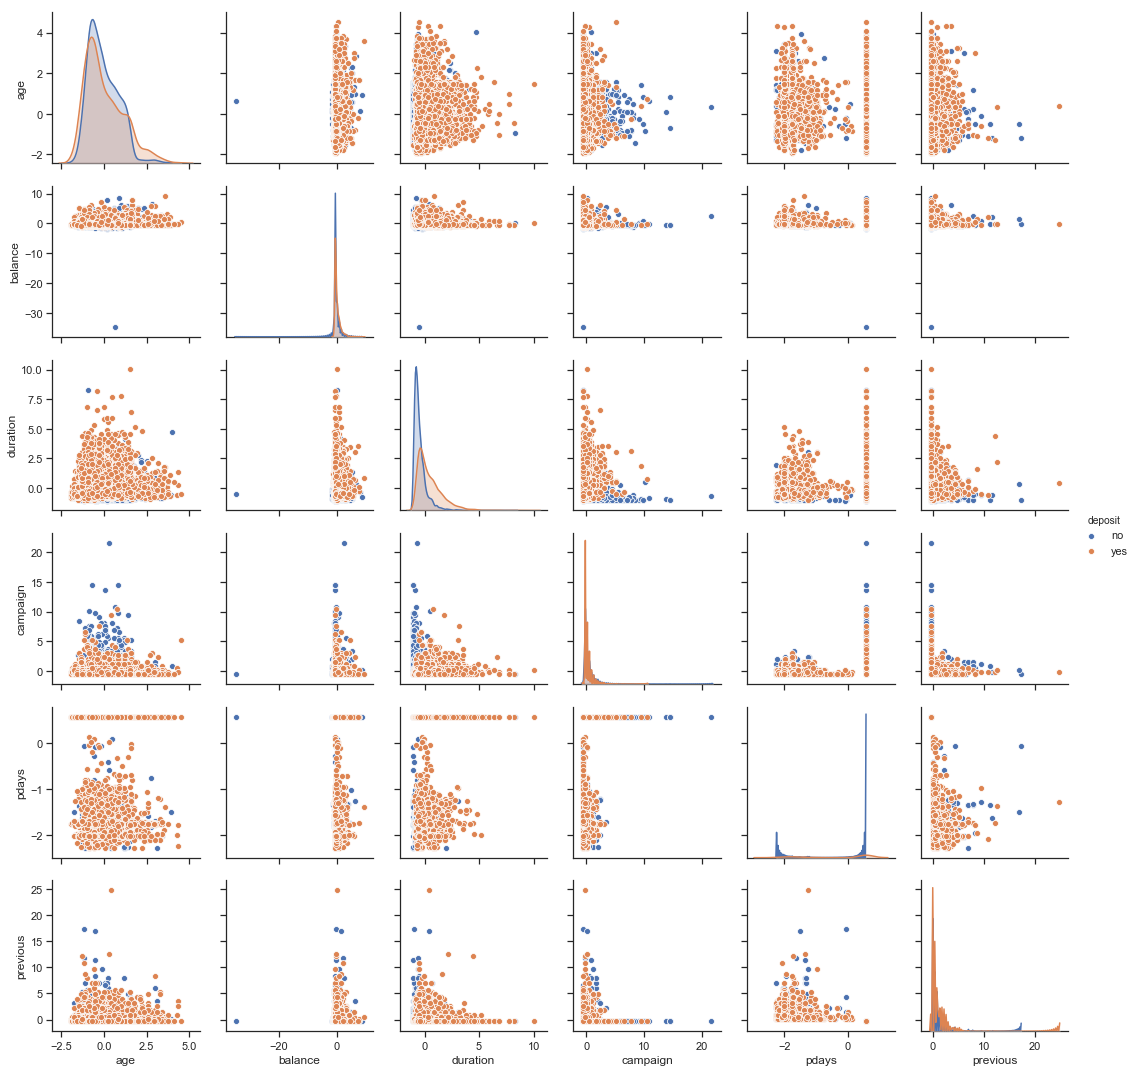

In [40]:
sns.pairplot(df1,hue="deposit")

In [50]:
# df2.plot()

5.830951894845301